In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
np.random.seed(123)

In [3]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [14]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))
class KMeans:
    def __init__(self,K=5,max_iters=100,plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # lsit of sample indices for each clusters
        self.clusters = [[] for _ in range(self.K)]

        self.centroids = []

    def predict(self,X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace = True)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            centroids_old = self.centroids
            self.cenroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()


        return self._get_cluster_lables(self.clusters)

    def _get_cluster_lables(self, clusters):
        lables = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                lables[sample_idx] = cluster_idx

        return lables
        pass
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx=self._closest_centroid(sample,centroids)
            clusters[centroid_idx].append(idx)
        return clusters
        pass

    def _closest_centroid(self,sample, centroids):
        distances = [euclidean_distance(sample,point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index
        pass

    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx]=cluster_mean

        return centroids
        pass

    def _is_converged(self,centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i],centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12,8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point, marker='x', color='black',linewidth=2)
        plt.show()

In [15]:
from sklearn.datasets import make_blobs

In [16]:
X, y = make_blobs(
    centers=3,
    n_samples=500,
    n_features=2,
    shuffle=True,
    random_state=40
)

In [17]:
clusters = len(np.unique(y))

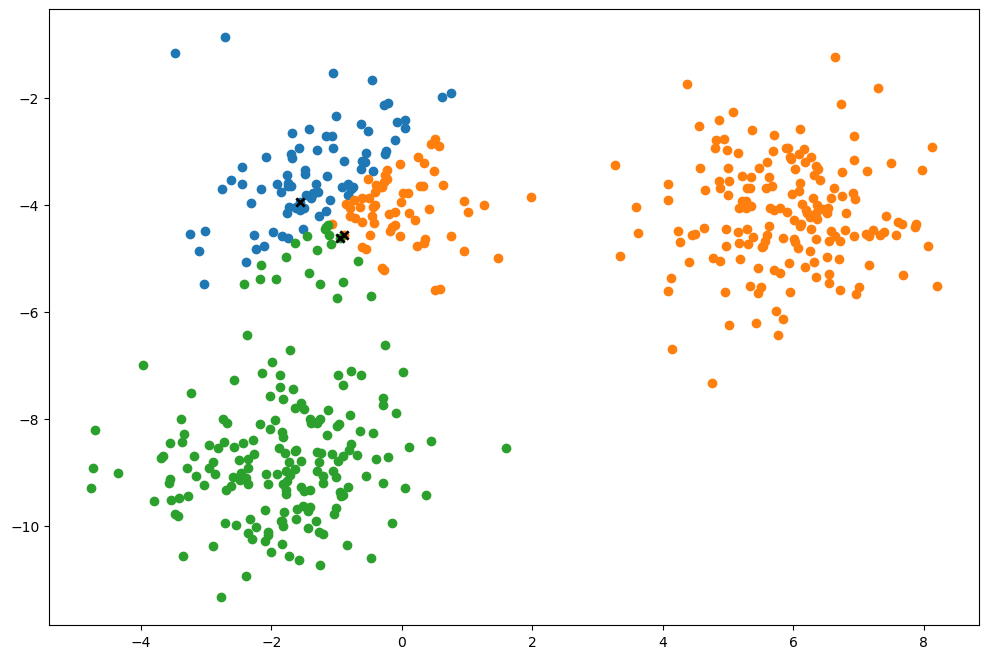

In [24]:
k = KMeans(max_iters=500,K=clusters,plot_steps=True)
y_pred = k.predict(X)